# Diagnosing model performance

## State-of-the-art
- evaluation of model performance to quantify the prediction skill
- well-established performance metrics like KGE and NSE
- number between $-\inf$ and 1, but these numbers only provide limited insights into model perfomance
- if my model performance is bad: where do the errors come from? What processes might not be captured by the model?

## Objectives
- Objective: Diagnosing model performance by introducing a novel efficiency measure based on flow duration curve.
- Flow duration curve covers different processes (e.g. runoff generation, storage recession)

This notebook demonstrates the usage of DE and provides a proof of concept. We use observed streamflow data from the river Pfinz, Germany, which is located in the file examples/data/9960682_Q_1970_2012.csv.

In [1]:
import datetime as dt
import numpy as np
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Polygon
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy as sp
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})  # controlling figure aesthetics
from de import de

First, we import a daily observed streamflow time series and plot the time series:

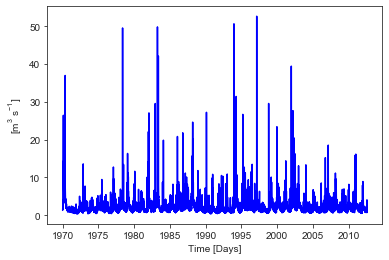

In [2]:
# Import a function that deals with paths properly, regardless of OS
from pathlib import Path  

path = Path('/Users/robo/Desktop/PhD/de/examples/data/9960682_Q_1970_2012.csv')
df_ts = de.import_ts(path, sep=';') # import observed time series
de.plot_ts(df_ts)

## Proof of concept
In order to mimick model errors or input data errors, respectively, we manipulate the observed time series:
1. Mimicking model errors
2. Mimicking input data errors
3. Combination of 1. and 2.

### Mimicking model errors

#### Increase high flows - Decrease low flows

We generate a new by time series by increasing high flows and decreasing low flows.

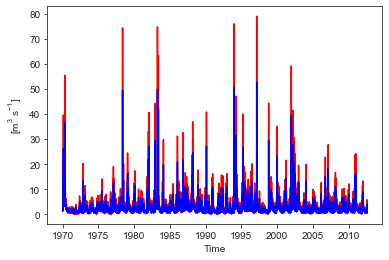

In [3]:
obs_sim = pd.DataFrame(index=df_ts.index, columns=['Qobs', 'Qsim'])
obs_sim.loc[:, 'Qobs'] = df_ts.loc[:, 'Qobs']
tsd = de.highover_lowunder(df_ts.copy(), prop=0.5)
obs_sim.loc[:, 'Qsim'] = tsd.loc[:, 'Qsim']  # disaggregated time series
de.plot_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])

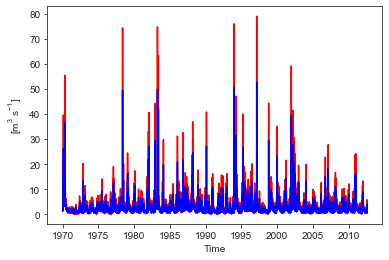

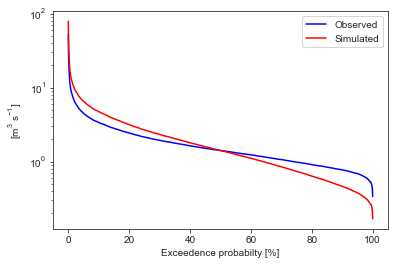

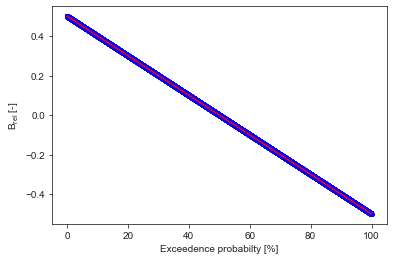

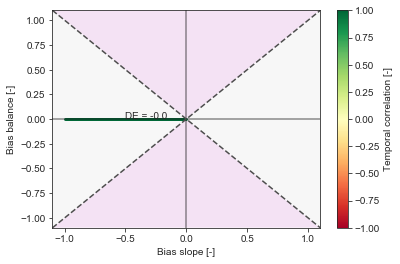

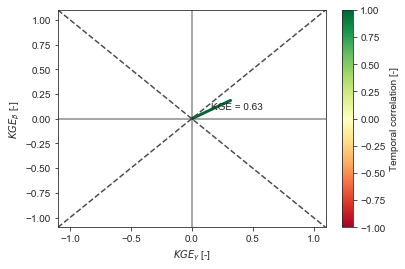

In [4]:
obs_sim = pd.DataFrame(index=df_ts.index, columns=['Qobs', 'Qsim'])
obs_sim.loc[:, 'Qobs'] = df_ts.loc[:, 'Qobs']
tsd = de.highover_lowunder(df_ts.copy(), prop=0.5)
obs_sim.loc[:, 'Qsim'] = tsd.loc[:, 'Qsim']  # disaggregated time series
de.plot_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])
de.fdc_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])
obs_arr = obs_sim['Qobs'].values
sim_arr = obs_sim['Qsim'].values

sig_de = de.calc_de(obs_arr, sim_arr)
sig_kge = de.calc_kge(obs_arr, sim_arr)
sig_nse = de.calc_nse(obs_arr, sim_arr)

de.vis2d_de(obs_arr, sim_arr)
de.vis2d_kge(obs_arr, sim_arr)